<a href="https://colab.research.google.com/github/violetamenendez/git_workshop/blob/main/git_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

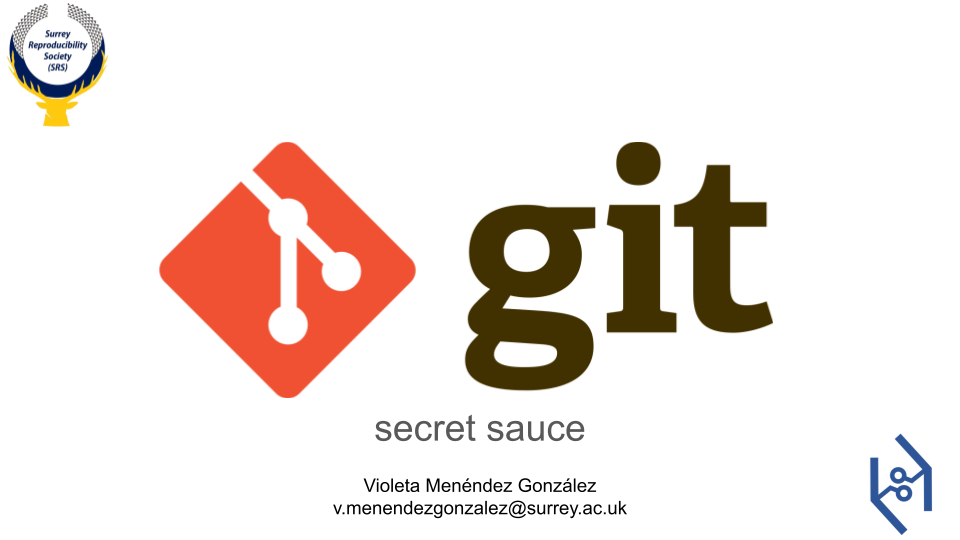

# git secret sauce

Welcome to the January 2023 edition of the Monthly Mini Hacks, and the second edition of this Git workshop.

We will learn the basics of git commands and git workflow. We will try to go deeper into some concepts and some more advance commands that will make your life easier. We will also try to cover some basic usage of github as a git service for code sharing and collaborating.

This notebook is meant to be an interactive interface for our workshop demos. You can see the previous workshop slides here: https://f1000research.com/slides/11-586 

git is a source code management tool and **version control**. It keeps track of the changes done to your code over time. It is **distributed**, meaning that each user has a full copy of the project, instead of relying on a central repository. If used well, git is very useful for **reproducibility** (you can check how your code worked at a specific time in the past), **collaboration** (everyone contributing to the same codebase at the same time), and **debugging** (it's easier to see when we introduced bugs and errors).

Terminology:

- **Repository** (repo): contains the project’s code and changes.

- **Working copy**: your own copy of the repository
- **Commit**: a git object that represents changes to the code
- **Revision**: a reference to a git object. In practice, is a version of your codebase
- Working tree or **working area**: where you work and make changes
- Index or **staging area**: changes that we want to commit

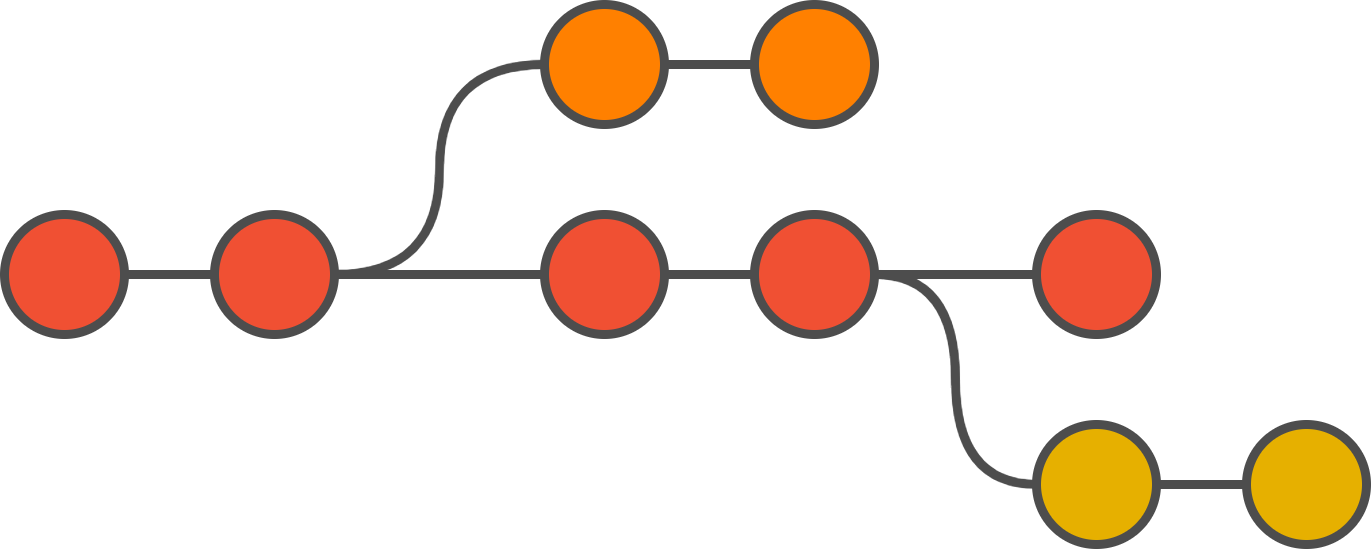

### Development history

Git tracks changes to our source code in a timeline or tree of changes. Good and clean history is important for easier code reviewing and debugging, overall improving the code quality as it's more difficult to introduce problems.

Changes are represented by commits, which are our tree nodes. Each commit encodes a codebase change, a point in development history, and consists of:
- A unique identifier (SHA1), to unambiguously refer to a point in time.
- A date
- An author
- A set of changes to the code (diff)
- A clear and concise message. Usually consisting of a short description, a new line, and additional longer descrition giving more context to the commit (e.g., why that change was needed).

History is editable, which is vital for good history, as we can modify it if we make a mistake and don't end up with lots of fix-up commits. You can edit your local history easily, but don't change history that has been pushed to a shared repo and people are using as it can mess up with their work!

Important: History needs to be linear (commits don't depend on later commits), and atomic (commits are concise, fixing only one bug or implementing one feature.

> Pro tip: if the commit message contains the word `and` maybe think of breaking it down


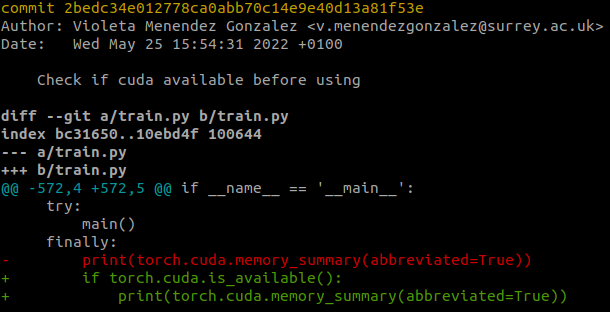


### Workflow
Development of your project happens in branches. The main or master branch is like the trunk of the tree, where we keep tested and clean changes. Feature branches are secondary branches where we carry on our development and experiments, before merging them into main.

Commits have an order. `HEAD` of a branch is the last commit. `<commit>~` represents the first parent of a given commit. `<commit>~<n>` is the nth parent of a commit. For example, `HEAD~` or `HEAD~1` is the penultimate commit. `commit3~2` would be `commit1`.

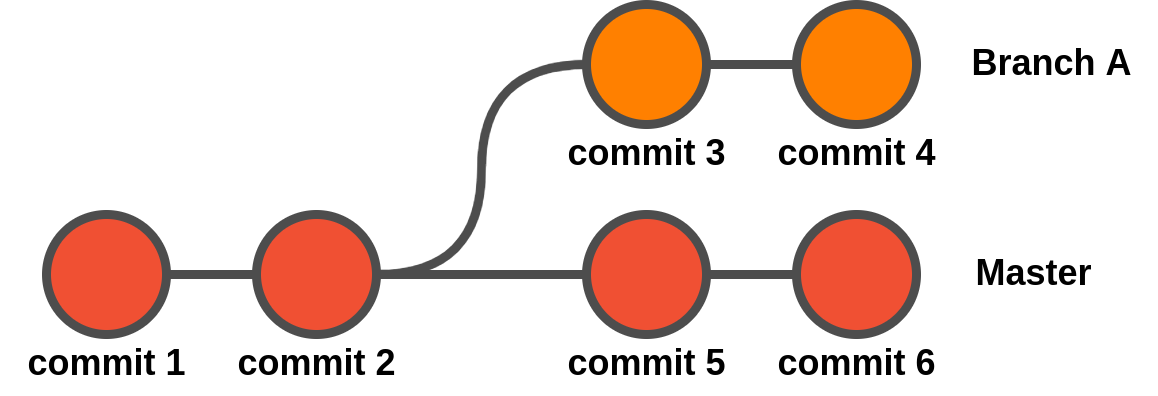

## Demo 1: Starting a repo

Different versions of git have different features. In the recent years some commands have been renamed to make them more user friendly. Many times there are several ways of doing one thing.

In [ ]:
!git --version

git version 2.25.1


### Config file

The configuration files is where we can define variables that affect the git commands behaviour. We can set the aspect and colours, the user information (name, email, github account,...), set alias for specific commands, etc...

There are three main configuration files:

 - `.git/config` - Local to the repository

 - `$HOME/.gitconfig` - per-user configuration. Changes apply to all your repositories

 - `/etc/gitconfig` - System wide configuration


In [ ]:
!git config user.name
!git config user.email

In [ ]:
!git config --global user.email "jan.minihack@mmh.com"

!git config --global user.name "Jan M. Minihack"

In [ ]:
!git config user.name
!git config user.email

Jan M. Minihack
jan.minihack@mmh.com


In [ ]:
!git config --list

filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
user.email=jan.minihack@mmh.com
user.name=Jan M. Minihack


In [ ]:
!mkdir git_workshop
%cd git_workshop

/content/git_workshop


### Basic commands

`git init` - creates a git repository

In [ ]:
!git init

Initialized empty Git repository in /content/git_workshop/.git/


`git status` - shows the status of your working area, files added, changed, removed, conflicts, files staged…

When we start a repo the working tree is completely clear

In [ ]:
!git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [ ]:
!echo "print('Hello world')" > hello.py
!cat hello.py

print('Hello world')


Once we add some files into our folder git can see the new files. These are untracked at first, and we need to manually add every file that we want to track. We can set some types of files to be ignored from the untracked list so they don't clutter our status. We can do this by adding them to .gitignore

In [ ]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	hello.py

nothing added to commit but untracked files present (use "git add" to track)


`git diff` - shows all code changes in your working area. You may have several commits worth of changes

Right now it doesn't show anything because we are not tracking any files yet!

In [ ]:
!git diff

`git add <file> [<file2>...]` - add files to the index for commit

In [ ]:
!git add hello.py

Now we can see that the file has been added to the index tree and is ready for commit

In [ ]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   hello.py



In [ ]:
`git diff --cached` - show all changes that have been staged. If there’s something you don’t like you can make changes

In [ ]:
!git diff --cached

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


`git commit` - creates a commit with all the files in the staging area. Prompts for a command message
> Pro tip: git commit -m “Short concise message” to make the message faster

In [ ]:
!git commit -m "Add hello world"

[master (root-commit) 720f19b] Add hello world
 1 file changed, 1 insertion(+)
 create mode 100644 hello.py


We have commited all changes, so `git status` shows a clean working tree

In [ ]:
!git status

On branch master
nothing to commit, working tree clean


`git log` - shows all the commits in your current branch
>Pro tip: `git log -p` - to show the commit including code changes (diff)

>Pro tip: `git log --oneline` - to show the logs in short mode

>Pro tip: `git log --stat` - to show the logs and files that have been changed, but not the changes themselves

In [ ]:
!git log

commit 720f19b31be90d79924ba77fbd157c3c548c696f (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world


In [ ]:
!git log -p

commit 720f19b31be90d79924ba77fbd157c3c548c696f (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


In [ ]:
!git log --stat

commit 720f19b31be90d79924ba77fbd157c3c548c696f (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world

 hello.py | 1 +
 1 file changed, 1 insertion(+)


In [ ]:
!git log --oneline

720f19b (HEAD -> master) Add hello world


`git show <revision>` - show the diff of a specific commit

In [ ]:

!git show HEAD

commit 720f19b31be90d79924ba77fbd157c3c548c696f (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


Don't worry about what's happening with the files. This is just adding some lines at the end of the file so we can see how to deal with changes. Using sed, cat and other bash commands is not the scope of this tutorial.

In [ ]:
!sed -i '$s/$/\n\nprint("and goodbye"/' hello.py
!cat hello.py

print('Hello world')

print("and goodbye"


In [ ]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index f7d1785..773323c 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye"


Now we also add a line at the beginning of the file. We can see with `git diff` that we have new lines (marked with `+`) before and after the already existing `print('Hello world')`

In [ ]:
!sed -i "1s/^/print('Hey!!')\n/" hello.py

In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index f7d1785..99a7853 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,4 @@
+print('Hey!!')
 print('Hello world')
+
+print("and goodbye"


Super tip!

`git add -p` - add individual changes to the index

When prompted, first choose choose `s` (split), then for the first hunk choose `n` (no) when prompted again, and for the second hunk choose `y` (yes). You can select `?` if you're not sure what the options are

In [ ]:
!git add -p

diff --git a/hello.py b/hello.py
index f7d1785..99a7853 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,4 @@
+print('Hey!!')
 print('Hello world')
+
+print("and goodbye"
(1/1) Stage this hunk [y,n,q,a,d,s,e,?]? ?
y - stage this hunk
n - do not stage this hunk
q - quit; do not stage this hunk or any of the remaining ones
a - stage this hunk and all later hunks in the file
d - do not stage this hunk or any of the later hunks in the file
s - split the current hunk into smaller hunks
e - manually edit the current hunk
? - print help
@@ -1 +1,4 @@
+print('Hey!!')
 print('Hello world')
+
+print("and goodbye"
(1/1) Stage this hunk [y,n,q,a,d,s,e,?]? s
Split into 2 hunks.
@@ -1 +1,2 @@
+print('Hey!!')
 print('Hello world')
(1/2) Stage this hunk [y,n,q,a,d,j,J,g,/,e,?]? n
@@ -1 +2,3 @@
 print('Hello world')
+
+print("and goodbye"
(2/2) Stage this hunk [y,n,q,a,d,K,g,/,e,?]? y



We have added to the index or staging area only the change that adds a line at the end. The change that adds a line at the top is still in our working area. So if we commit now, we will only commit one change. This is useful for when we are making lots of changes at the same time, but they all belong to different conceptual changes, and therefore to different commits.

In [ ]:
!git status

On branch master
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py



`git diff` shows the changes that are in our working tree and not ready to commit

In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index 773323c..99a7853 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
 print("and goodbye"


`git diff --staged` shows the changes that are in the staging area ready to be committed!

In [ ]:
!git diff --staged

diff --git a/hello.py b/hello.py
index f7d1785..773323c 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye"


In [ ]:
!git commit -m "Add farewell"

[master cfbbe52] Add farewell
 1 file changed, 2 insertions(+)


In [ ]:
!git log -p

commit cfbbe52ac40204b4f34f3f611590d0c35103138f (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:49:39 2023 +0000

    Add farewell

diff --git a/hello.py b/hello.py
index f7d1785..773323c 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye"

commit 720f19b31be90d79924ba77fbd157c3c548c696f
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


We have double checked our commit with `git log -p` and realised that there is a problem with our code! There's a missing closing parenthesis. But we have already committed all the changes. Let's fix it. First we make the necessary changes.

In [ ]:
!sed -i '$s/$/)/' hello.py
!cat hello.py

print('Hey!!')
print('Hello world')

print("and goodbye")


Then we add the relevant changes that fix the issue to the staging area. But remember we still had other changes in our working area that we didn't want to commit, so we cannot just add the whole file. We need to select the bits that we want.

When prompted, first choose choose `s` (split), then for the first hunk choose `n` (no) when prompted again, and for the second hunk choose `y` (yes)

In [ ]:
!git add -p

diff --git a/hello.py b/hello.py
index 773323c..daaca5d 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
-print("and goodbye"
+print("and goodbye")
(1/1) Stage this hunk [y,n,q,a,d,s,e,?]? s
Split into 2 hunks.
@@ -1,2 +1,3 @@
+print('Hey!!')
 print('Hello world')
 
(1/2) Stage this hunk [y,n,q,a,d,j,J,g,/,e,?]? n
@@ -1,3 +2,3 @@
 print('Hello world')
 
-print("and goodbye"
+print("and goodbye")
(2/2) Stage this hunk [y,n,q,a,d,K,g,/,e,?]? y



We now make sure that the changes are added correctly and only those changes.

In [ ]:
!git diff --staged

diff --git a/hello.py b/hello.py
index 773323c..d826caf 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,3 @@
 print('Hello world')
 
-print("and goodbye"
+print("and goodbye")


`git commit --amend` - change commit at HEAD of current branch

Basically adds any changes that are in the staging area to the last commit. It opens your editor so you can ammend the commit message too to make it more relevant. You could also use this command if you just want to rename the commit and not add any other changes (just make sure your staging area is clean!).

On your own computer it will be easier to just edit the commit message, save and close. To do it in this notebook just follow these instructions:

>Click at the end of the file where the cursor is flickering, then type `:wq` (this will save (w) the commit message as it is and will quit (q) the editor). When doing this in your computer the commit message will open in your own text editor of choice, you just need to modify the message if necessary and save and close the file.

In [ ]:
!git commit --amend

<ontent/git_workshop/.git/COMMIT_EDITMSG" 14L, 326C▽  [>c]10;?]11;?Add farewell

# Please enter the commit message for your changes. Lines starting
# with '#' will be ignored, and an empty message aborts the commit.
#
# Date:      Fri Jan 27 14:49:39 2023 +0000
#
# On branch master
# Changes to be committed:
#       modified:   hello.py
#
# Changes not staged for commit:
#       modified:   hello.py
#

[master 1afff4c] Add farewell
 Date: Fri Jan 27 14:49:39 2023 +0000
 1 file changed, 2 insertions(+)


There we go, we can see that now all the commits we have are full working implementations of different changes

In [ ]:
!git log -p

commit 1afff4cef7855ee0b4bfacedbb2a29a58e967a36 (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:49:39 2023 +0000

    Add farewell

diff --git a/hello.py b/hello.py
index f7d1785..d826caf 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye")

commit 720f19b31be90d79924ba77fbd157c3c548c696f
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


In [ ]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


we still had the other changes that we want to commit. Because they are the only changes left we could just use `git add hello.py`, but it's good practice to do `git add -p` to make sure we don't stage anything we don't want.

When prompted, choose `y` (yes)

In [ ]:
!git add -p

diff --git a/hello.py b/hello.py
index d826caf..daaca5d 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
 print("and goodbye")
(1/1) Stage this hunk [y,n,q,a,d,e,?]? y



In [ ]:
!git status

On branch master
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py



We have thought about it better and really we don't need that other line in our code. Hello world is fine as it is. Let's just get rid of this change by doing what `git status` is telling us. First we unstage the changes with:

`git restore --staged <file>` - remove any changes you don’t like from the index into the working tree

Changes still exist but they won't be commited.


In [ ]:
!git restore --staged hello.py

In [ ]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


We are really decided to just get rid of these changes because we do not need them at all. So again we listen to `git status` on how to discard changes in working directory

`git restore <file>` - discard any changes from the working tree

> ATTENTION!! This will DELETE the changes and you cannot recover them in ANY WAY



In [ ]:
!git restore hello.py

In [ ]:
!git status

On branch master
nothing to commit, working tree clean


In [ ]:
!cat hello.py

print('Hello world')

print("and goodbye")


## Demo 2: git config/setup

As I mentioned earlier, we can add lots of information into our config file. In here we show how to add a git alias for a complicated command that there would be no way to remember otherwise. We just add one line with the command we want in our `~/.git/config` file under the option `[alias]`.

```
[alias]
     newcommand = fancy --long --command --with-lots --of=flags
```
Now every time we do `git newcommand` we will be performing the fancy one.

In [ ]:
!git log --oneline

1afff4c (HEAD -> master) Add farewell
720f19b Add hello world


In [ ]:
!ls -a .git

.   branches	    config	 HEAD	index  logs	refs
..  COMMIT_EDITMSG  description  hooks	info   objects


In [ ]:
!cat .git/config

[core]
	repositoryformatversion = 0
	filemode = true
	bare = false
	logallrefupdates = true


In [ ]:
!git log --graph --full-history --all --color --pretty=tformat:"%x1b[31m%h%x09%x1b[32m%d%x1b[0m%x20%s%x20%x1b[33m(%an)%x1b[0m"


* 1afff4c	 (HEAD -> master) Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!echo "[alias]" >> .git/config
!echo -e "\tgr = log --graph --full-history --all --color --pretty=tformat:\"%x1b[31m%h%x09%x1b[32m%d%x1b[0m%x20%s%x20%x1b[33m(%an)%x1b[0m\"" >> .git/config

In [ ]:
!cat .git/config

[core]
	repositoryformatversion = 0
	filemode = true
	bare = false
	logallrefupdates = true
[alias]
	gr = log --graph --full-history --all --color --pretty=tformat:"%x1b%h%x09%x1b%d%x1b%x20%s%x20%x1b(%an)%x1b"


In [ ]:
!git gr

* 1afff4c	 (HEAD -> master) Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


## Demo 3: Branching

Because git is a tree of changes of our codebase, we can intuitively work on branches.

Branches are versions of our code that can exist in parallel, splitting from the main trunk at any point. They can just exist locally in our computer or be shared with other people. They are very fast to create and to switch between them, so it's a very convenient way of working in very modular changes, and being able to compare between them.

Branches consist of one or more commits. They can be "moved around" to different times in history, to incorporate new changes, or discard old changes.

Remember:

>The **main** or master branch is like the trunk of the tree, where we keep tested and clean changes. **Feature branches** are secondary branches where we carry on our development and experiments, before merging them into main.



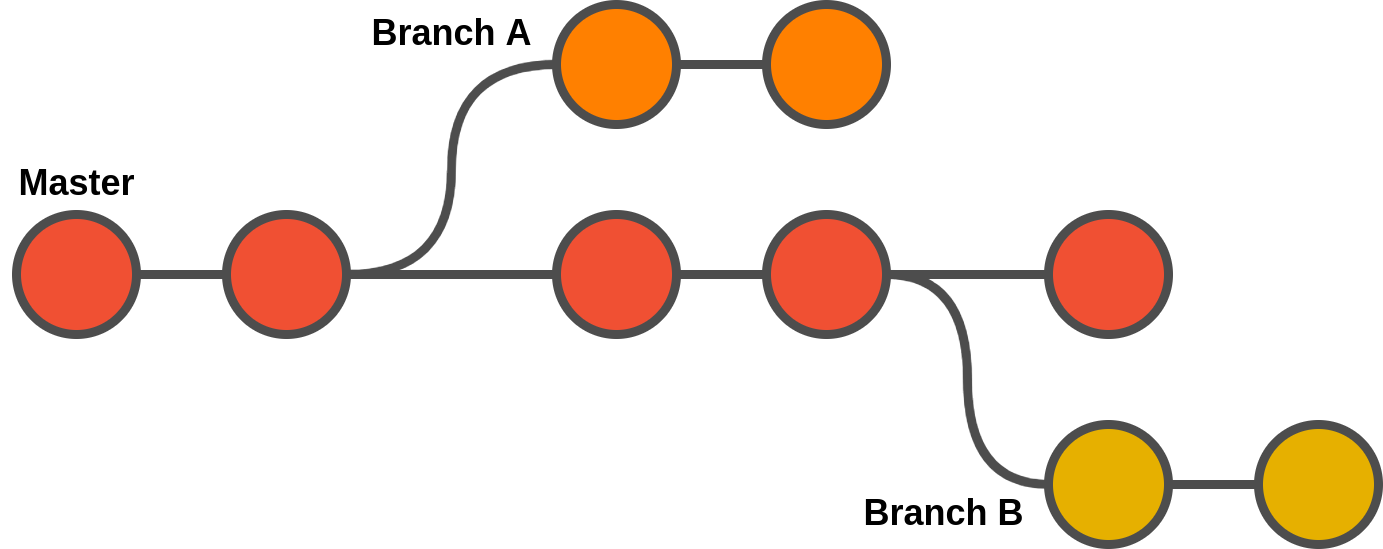

**`git branch`** - show all branches in your repo (* star on you current branch)



In [ ]:
!git branch

* master


**`git branch <name>`** - creates branch (but not checked out)
> Pro tip: follow a good and clear name system that describes the feature you’re developing. If you are carrying out different independent changes, think of creating different branches and switch between them. If you’re working with other people it can be useful to use the convention name/feature (e.g., *violeta/data_validation*)


In [ ]:
!git branch violeta/test1
!git branch

* master
  violeta/test1


**`git switch <branch_name>`** - switch to branch
> *Pro tip:* `git switch -c <name>` - will **c**reate the branch AND switch to it in one

> *Note:* old command  `git checkout -b <name>` - create **b**ranch and checkout (switch) to it

In [ ]:
!git switch violeta/test1

Switched to branch 'violeta/test1'


In [ ]:
!git branch

  master
* violeta/test1


We have changed branches now. `git log` shows us our history. We can see that both `master` and `violeta/test1` have the same `HEAD`. The `HEAD` is pointing at our current branch.

In [ ]:
!git gr

* 1afff4c	 (HEAD -> violeta/test1, master) Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git switch master

Switched to branch 'master'


In [ ]:
!git gr

* 1afff4c	 (HEAD -> master, violeta/test1) Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git switch violeta/test1

Switched to branch 'violeta/test1'


Now we can create a second branch. But this time it's not coming out of `main`, but it sprouts out of our first branch `violeta/test1`

In [ ]:
!git switch  -c violeta/test2
!git branch

Switched to a new branch 'violeta/test2'
  master
  violeta/test1
* violeta/test2


We can make some experimental changes to our branch and commit them, to start developing our new program.

In [ ]:
!sed -i "1s/^/print('Hey!!')\n/" hello.py
!cat hello.py

print('Hey!!')
print('Hello world')

print("and goodbye")


In [ ]:
!git status

On branch violeta/test2
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git commit -am "Try a different greeting"

[violeta/test2 5e33eea] Try a different greeting
 1 file changed, 1 insertion(+)


Now with `git log` we can see that our `HEAD` is at the last commit of `violeta/test2`, but the branches `violeta/test1` and `master` are one commit behind!

In [ ]:
!git log -p

commit 5e33eea078da4c27bd0cc96c67347b5eb45e81d0 (HEAD -> violeta/test2)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:14:59 2023 +0000

    Try a different greeting

diff --git a/hello.py b/hello.py
index d826caf..daaca5d 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
 print("and goodbye")

commit 1afff4cef7855ee0b4bfacedbb2a29a58e967a36 (violeta/test1, master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:49:39 2023 +0000

    Add farewell

diff --git a/hello.py b/hello.py
index f7d1785..d826caf 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye")

commit 720f19b31be90d79924ba77fbd157c3c548c696f
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


In [ ]:
!git gr

* 5e33eea	 (HEAD -> violeta/test2) Try a different greeting (Jan M. Minihack)
* 1afff4c	 (violeta/test1, master) Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


Ok, so we switch to our first branch and do some changes...

In [ ]:
!git switch violeta/test1

Switched to branch 'violeta/test1'


In [ ]:
!sed -i "1s/^/print('Yoyoyo!!')\n/" hello.py
!cat hello.py

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")


In [ ]:
!git commit -am "Try a different more casual greeting"

[violeta/test1 a1f2bc9] Try a different more casual greeting
 1 file changed, 1 insertion(+)


In [ ]:
!git log --oneline

a1f2bc9 (HEAD -> violeta/test1) Try a different more casual greeting
1afff4c (master) Add farewell
720f19b Add hello world


Now with our fancy `git log` B-) we can see that the feature branches are branching off master in different directions! What a beautiful sapling!

In [ ]:
!git gr

* a1f2bc9	 (HEAD -> violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| * 5e33eea	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 (master) Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


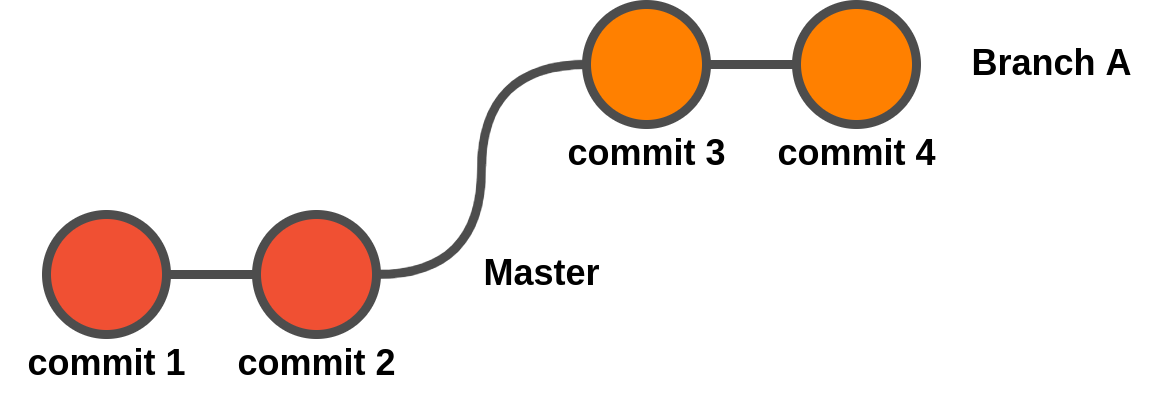

Ok, so we have done two different experiments in two different feature branches to see what we like the most. We really like the changes in branch `violeta/test2`, so we want to incorporate them into our main development branch `master`.

**`git merge <branch>`** - merges branch ONTO your current branch
You merge a branch onto your current branch, doesn’t have to be `master`. Make sure you check what your current branch is!!

We switch to master first (remember we can either do `git switch` or `git checkout`).

In [ ]:
!git checkout master

Switched to branch 'master'


In [ ]:
!git log

commit 1afff4cef7855ee0b4bfacedbb2a29a58e967a36 (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:49:39 2023 +0000

    Add farewell

commit 720f19b31be90d79924ba77fbd157c3c548c696f
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world


Then we merge our selected branch onto the current branch which is `master`

In [ ]:
!git merge violeta/test2

Updating 1afff4c..5e33eea
Fast-forward
 hello.py | 1 +
 1 file changed, 1 insertion(+)


And voila! `master` and `violeta/test2` contain the same commits.

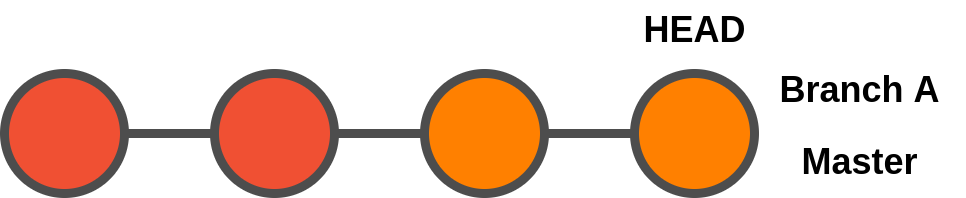

In [ ]:
!git log

commit 5e33eea078da4c27bd0cc96c67347b5eb45e81d0 (HEAD -> master, violeta/test2)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:14:59 2023 +0000

    Try a different greeting

commit 1afff4cef7855ee0b4bfacedbb2a29a58e967a36
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:49:39 2023 +0000

    Add farewell

commit 720f19b31be90d79924ba77fbd157c3c548c696f
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world


We still have the other branch with some other changes. And actually... thinking about it, we do really like these changes too! So lets merge them into `master`

In [ ]:
!git gr

* a1f2bc9	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| * 5e33eea	 (HEAD -> master, violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git merge violeta/test1

Auto-merging hello.py
CONFLICT (content): Merge conflict in hello.py
Automatic merge failed; fix conflicts and then commit the result.


Oh no!!!!!!!!! merge CONFLICT!!! The time we were dreading is upon us. But do not FRET. WE are here to learn how to deal with these things so you never have to be afraid of git ever again.

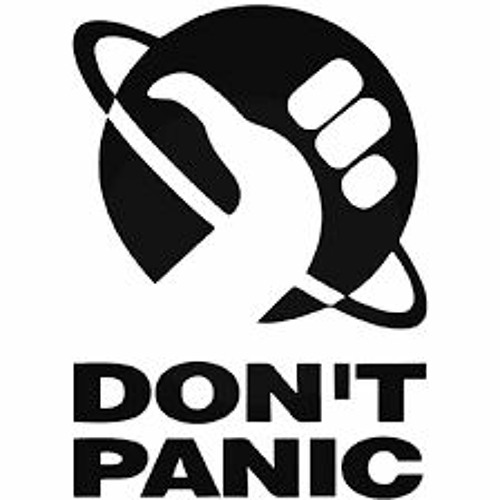

Don't panic. `git status` will save the day and tell us what to do.

`git status` says that there was a conflict where both branches were trying to modify the same bit. We just need to fix the conflicts and commit the changes. If we regret all our decisions we can always run `git merge --abort` and pretend like nothing had happened.

In [ ]:
!git status

On branch master
You have unmerged paths.
  (fix conflicts and run "git commit")
  (use "git merge --abort" to abort the merge)

Unmerged paths:
  (use "git add <file>..." to mark resolution)
	both modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


Our file now contains this strange message. It means that the `HEAD` commit of our current branch contains one phrase, but the new branch `violeta/test1` is trying to add a different statement in the same line. So git doesn't know how to blend these changes cleanly. Do you wan to substitute ''Hey'' by ''Yoyoyo''? Do you want to keep both messages? It's up to you to decide what the behaviour you wanted is.

In [ ]:
!git diff

diff --cc hello.py
index daaca5d,51e9ef2..0000000
--- a/hello.py
+++ b/hello.py
@@@ -1,4 -1,4 +1,8 @@@
++<<<<<<< HEAD
 +print('Hey!!')
++=======
+ print('Yoyoyo!!')
++>>>>>>> violeta/test1
  print('Hello world')
  
  print("and goodbye")


We have decided that we don't want the ''Hey'' any more. So we just edit the file to remove that line and all the other automatically generated lines containing `====` and `>>>>`

In [ ]:
!echo -e "print('Yoyoyo!!')\nprint('Hello world')\n\nprint(\"and goodbye\")" > hello.py
!cat hello.py

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")


Cool, git status still says that we need to mark the fix as resolved by adding the changes and commiting them manually. So let's just do that

In [ ]:
!git status

On branch master
You have unmerged paths.
  (fix conflicts and run "git commit")
  (use "git merge --abort" to abort the merge)

Unmerged paths:
  (use "git add <file>..." to mark resolution)
	both modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add hello.py

In [ ]:
!git status

On branch master
All conflicts fixed but you are still merging.
  (use "git commit" to conclude merge)

Changes to be committed:
	modified:   hello.py



In [ ]:
!git diff --staged

diff --git a/hello.py b/hello.py
index daaca5d..51e9ef2 100644
--- a/hello.py
+++ b/hello.py
@@ -1,4 +1,4 @@
-print('Hey!!')
+print('Yoyoyo!!')
 print('Hello world')
 
 print("and goodbye")


In [ ]:
!git commit -m "Update greeting"

[master c377665] Update greeting


Amazing. Now we have everything in a single branch in `master`. We have added a merge message which just looks a bit weird in the history of changes, but let's not worry about it for now.

In [ ]:
!git log -p

commit 5f2765874d2308c8dabb8cc465682dbb7527c3ad (HEAD -> master)
Merge: 15ccfff 1789acf
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 13:59:32 2023 +0000

    Update greeting

commit 1789acfd9004bec3d5bedd5249cbe35e5066c2f8 (violeta/test1)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 13:59:30 2023 +0000

    Try a different more casual greeting

diff --git a/hello.py b/hello.py
index d826caf..51e9ef2 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Yoyoyo!!')
 print('Hello world')
 
 print("and goodbye")

commit 15ccfff8a9cd4a85c4c13d98ad562d60cf020331 (violeta/test2)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 13:59:29 2023 +0000

    Try a different greeting

diff --git a/hello.py b/hello.py
index d826caf..daaca5d 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
 print("and goodbye")

commit 325cf6690a32059ad947c860b024a0a01af8d938
Author: Jan M. Minihack <jan.miniha

If we show the graph of our history though... Things are not looking so smoothly. What is that? We had two branches that were branching off, and suddenly they are just merged by that commit that doesn't really contain any changes. Urgh. Not ideal, but we will see how to deal with that later on.

In [ ]:
!git gr

*   c377665	 (HEAD -> master) Update greeting (Jan M. Minihack)
|\  
| * a1f2bc9	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
* | 5e33eea	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


## Demo 4: Revisions, stash and reset

In [ ]:
!git show HEAD~2

commit 1afff4cef7855ee0b4bfacedbb2a29a58e967a36
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:49:39 2023 +0000

    Add farewell

diff --git a/hello.py b/hello.py
index f7d1785..d826caf 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye")


In [ ]:
!git checkout HEAD~2

Note: switching to 'HEAD~2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 1afff4c Add farewell


In [ ]:
!sed -i '$s/$/\n\nprint("byeeee")/' hello.py
!cat hello.py

print('Hello world')

print("and goodbye")

print("byeeee")


In [ ]:
!git status

HEAD detached at 1afff4c
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index d826caf..4ed4d24 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
 print('Hello world')
 
 print("and goodbye")
+
+print("byeeee")


In [ ]:
!git commit -am "More goodbyes"

[detached HEAD 7bfb8e3] More goodbyes
 1 file changed, 2 insertions(+)


In [ ]:
!git log

commit 7bfb8e32f664a80f745779f45ce6be5a74f865d9 (HEAD)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:27:28 2023 +0000

    More goodbyes

commit 1afff4cef7855ee0b4bfacedbb2a29a58e967a36
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:49:39 2023 +0000

    Add farewell

commit 720f19b31be90d79924ba77fbd157c3c548c696f
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 14:44:40 2023 +0000

    Add hello world


In [ ]:
!git switch -

any of your branches:

  7bfb8e3 More goodbyes

If you want to keep it by creating a new branch, this may be a good time
to do so with:

 git branch <new-branch-name> 7bfb8e3

Switched to branch 'master'


In [ ]:
!git log --oneline

c377665 (HEAD -> master) Update greeting
a1f2bc9 (violeta/test1) Try a different more casual greeting
5e33eea (violeta/test2) Try a different greeting
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git checkout HEAD~2

Note: switching to 'HEAD~2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 1afff4c Add farewell


In [ ]:
!sed -i '$s/$/\n\nprint("adieu!")/' hello.py
!cat hello.py

print('Hello world')

print("and goodbye")

print("adieu!")


In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index d826caf..29443ce 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
 print('Hello world')
 
 print("and goodbye")
+
+print("adieu!")


In [ ]:
!git commit -am "More dramatic farewell"

[detached HEAD 5ab87cb] More dramatic farewell
 1 file changed, 2 insertions(+)


In [ ]:
!git switch -c violeta/test3

Switched to a new branch 'violeta/test3'


In [ ]:
!git gr

* 5ab87cb	 (HEAD -> violeta/test3) More dramatic farewell (Jan M. Minihack)
| *   c377665	 (master) Update greeting (Jan M. Minihack)
| |\  
| | * a1f2bc9	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| |/  
|/|   
| * 5e33eea	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!sed -i "1s/^/print('Bonjour...')\n/" hello.py
!cat hello.py

print('Bonjour...')
print('Hello world')

print("and goodbye")

print("adieu!")


In [ ]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git switch master

error: Your local changes to the following files would be overwritten by checkout:
	hello.py
Please commit your changes or stash them before you switch branches.
Aborting


In [ ]:
!git stash

Saved working directory and index state WIP on test3: 5ab87cb More dramatic farewell


In [ ]:
!git status

On branch violeta/test3
nothing to commit, working tree clean


In [ ]:
!git switch master

Switched to branch 'master'


In [ ]:
!git switch -

Switched to branch 'violeta/test3'


In [ ]:
!git status

On branch violeta/test3
nothing to commit, working tree clean


In [ ]:
!git stash list

stash@{0}: WIP on test3: 5ab87cb More dramatic farewell


In [ ]:
!git stash pop

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")
Dropped refs/stash@{0} (89e9fc98e5c888b53136f8c8a06054fe51b35a09)


In [ ]:
!git stash list

In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index 29443ce..78d89e1 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")


In [ ]:
!git commit -am "Add French greeting"

[violeta/test3 6f18567] Add French greeting
 1 file changed, 1 insertion(+)


In [ ]:
!git log --oneline

6f18567 (HEAD -> violeta/test3) Add French greeting
5ab87cb More dramatic farewell
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git status

On branch violeta/test3
nothing to commit, working tree clean


In [ ]:
!sed -i '$s/$/\n\nprint("The End")/' hello.py
!cat hello.py

print('Bonjour...')
print('Hello world')

print("and goodbye")

print("adieu!")

print("The End")


In [ ]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index 78d89e1..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,5 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")


In [ ]:
!git log --oneline

6f18567 (HEAD -> violeta/test3) Add French greeting
5ab87cb More dramatic farewell
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git reset --soft HEAD~1

In [ ]:
!git log --oneline

5ab87cb (HEAD -> violeta/test3) More dramatic farewell
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git status

On branch violeta/test3
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py



In [ ]:
!git diff --staged

diff --git a/hello.py b/hello.py
index 29443ce..78d89e1 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")


In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index 78d89e1..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,5 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")


In [ ]:
!git commit -m "Add French greeting"

[violeta/test3 0cf0793] Add French greeting
 1 file changed, 1 insertion(+)


In [ ]:
!git log --oneline

0cf0793 (HEAD -> violeta/test3) Add French greeting
5ab87cb More dramatic farewell
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index 78d89e1..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,5 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")


In [ ]:
!git reset --mixed HEAD~1

Unstaged changes after reset:
M	hello.py


In [ ]:
!git log --oneline

5ab87cb (HEAD -> violeta/test3) More dramatic farewell
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index 29443ce..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -1,5 +1,8 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")


When prompted, first choose `s` (split), then for the first hunk choose `y` (yes) when prompted again, and for the second hunk choose `q` (quit).

`q` will tell `git add` that you do not want to stage this hunk or any of the remaining hunks. Right now we only have two hunks (separate changes), but in a normal situation you will have lots of small changes, so if you are interested only in staging one change, you can `y` that change and then `q` instead of saying `n` to all of them.

In [ ]:
!git add -p

diff --git a/hello.py b/hello.py
index 29443ce..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -1,5 +1,8 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")
(1/1) Stage this hunk [y,n,q,a,d,s,e,?]? s
Split into 2 hunks.
@@ -1,5 +1,6 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")
 
 print("adieu!")
(1/2) Stage this hunk [y,n,q,a,d,j,J,g,/,e,?]? y
@@ -1,5 +2,7 @@
 print('Hello world')
 
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")
(2/2) Stage this hunk [y,n,q,a,d,K,g,/,e,?]? q



In [ ]:
!git diff --staged

diff --git a/hello.py b/hello.py
index 29443ce..78d89e1 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")


In [ ]:
!git commit -m "Add French greeting"

[violeta/test3 955dd58] Add French greeting
 1 file changed, 1 insertion(+)


In [ ]:
!git log --oneline

955dd58 (HEAD -> violeta/test3) Add French greeting
5ab87cb More dramatic farewell
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git reset --hard HEAD~1

HEAD is now at 5ab87cb More dramatic farewell


In [ ]:
!git log --oneline

5ab87cb (HEAD -> violeta/test3) More dramatic farewell
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git status

On branch violeta/test3
nothing to commit, working tree clean


In [ ]:
!cat hello.py

print('Hello world')

print("and goodbye")

print("adieu!")


## Demo 5: Linear history with **rebase**

In [ ]:
!git gr

* 5ab87cb	 (HEAD -> violeta/test3) More dramatic farewell (Jan M. Minihack)
| *   c377665	 (master) Update greeting (Jan M. Minihack)
| |\  
| | * a1f2bc9	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| |/  
|/|   
| * 5e33eea	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git switch master

Switched to branch 'master'


In [ ]:
!cat hello.py

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")


In [ ]:
!git switch violeta/test3

Switched to branch 'violeta/test3'


In [ ]:
!cat hello.py

print('Hello world')

print("and goodbye")

print("adieu!")


In [ ]:
!git log --oneline

5ab87cb (HEAD -> violeta/test3) More dramatic farewell
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git rebase master

First, rewinding head to replay your work on top of it...
Applying: More dramatic farewell
Using index info to reconstruct a base tree...
M	hello.py
Falling back to patching base and 3-way merge...
Auto-merging hello.py


In [ ]:
!git log --oneline

f93eac1 (HEAD -> violeta/test3) More dramatic farewell
c377665 (master) Update greeting
a1f2bc9 (violeta/test1) Try a different more casual greeting
5e33eea (violeta/test2) Try a different greeting
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git gr

* f93eac1	 (HEAD -> violeta/test3) More dramatic farewell (Jan M. Minihack)
*   c377665	 (master) Update greeting (Jan M. Minihack)
|\  
| * a1f2bc9	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
* | 5e33eea	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git switch master

Switched to branch 'master'


In [ ]:
!git merge violeta/test3

Updating c377665..f93eac1
Fast-forward
 hello.py | 2 ++
 1 file changed, 2 insertions(+)


In [ ]:
!git gr

* f93eac1	 (HEAD -> master, violeta/test3) More dramatic farewell (Jan M. Minihack)
*   c377665	 Update greeting (Jan M. Minihack)
|\  
| * a1f2bc9	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
* | 5e33eea	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git checkout HEAD~3

Note: switching to 'HEAD~3'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 1afff4c Add farewell


In [ ]:
!git switch -c violeta/test4

Switched to a new branch 'violeta/test4'


In [ ]:
!sed -i '$s/$/\n\nprint("hasta la vista, baby")/' hello.py
!cat hello.py

print('Hello world')

print("and goodbye")

print("hasta la vista, baby")


In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index d826caf..b9c275e 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
 print('Hello world')
 
 print("and goodbye")
+
+print("hasta la vista, baby")


In [ ]:
!git add hello.py
!git commit -m "Add Terminator farewell"

[violeta/test4 cb7327a] Add Terminator farewell
 1 file changed, 2 insertions(+)


In [ ]:
!git log --oneline

cb7327a (HEAD -> violeta/test4) Add Terminator farewell
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git gr

* cb7327a	 (HEAD -> violeta/test4) Add Terminator farewell (Jan M. Minihack)
| * f93eac1	 (violeta/test3, master) More dramatic farewell (Jan M. Minihack)
| *   c377665	 Update greeting (Jan M. Minihack)
| |\  
| | * a1f2bc9	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| |/  
|/|   
| * 5e33eea	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git rebase master

First, rewinding head to replay your work on top of it...
Applying: Add Terminator farewell
Using index info to reconstruct a base tree...
M	hello.py
Falling back to patching base and 3-way merge...
Auto-merging hello.py
CONFLICT (content): Merge conflict in hello.py
error: Failed to merge in the changes.
Patch failed at 0001 Add Terminator farewell
hint: Use 'git am --show-current-patch' to see the failed patch
Resolve all conflicts manually, mark them as resolved with
"git add/rm <conflicted_files>", then run "git rebase --continue".
You can instead skip this commit: run "git rebase --skip".
To abort and get back to the state before "git rebase", run "git rebase --abort".


In [ ]:
!git am --show-current-patch

commit cb7327a4706624aefd6126eb9237fe6c66c9eb8d (violeta/test4)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:40:07 2023 +0000

    Add Terminator farewell

diff --git a/hello.py b/hello.py
index d826caf..b9c275e 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
 print('Hello world')
 
 print("and goodbye")
+
+print("hasta la vista, baby")


In [ ]:
!git status

rebase in progress; onto f93eac1
You are currently rebasing branch 'violeta/test4' on 'f93eac1'.
  (fix conflicts and then run "git rebase --continue")
  (use "git rebase --skip" to skip this patch)
  (use "git rebase --abort" to check out the original branch)

Unmerged paths:
  (use "git restore --staged <file>..." to unstage)
  (use "git add <file>..." to mark resolution)
	both modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git diff

diff --cc hello.py
index 31a5069,b9c275e..0000000
--- a/hello.py
+++ b/hello.py
@@@ -3,4 -2,4 +3,8 @@@ print('Hello world'
  
  print("and goodbye")
  
++<<<<<<< HEAD
 +print("adieu!")
++=======
+ print("hasta la vista, baby")
++>>>>>>> Add Terminator farewell


In [ ]:
!echo -e "print('Yoyoyo!!')\nprint('Hello world')\n\nprint(\"and goodbye\")\n\nprint(\"adieu!\")\nprint(\"hasta la vista, baby\")" > hello.py
!cat hello.py

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")

print("adieu!")
print("hasta la vista, baby")


In [ ]:
!git diff

diff --cc hello.py
index 31a5069,b9c275e..0000000
--- a/hello.py
+++ b/hello.py
@@@ -3,4 -2,4 +3,5 @@@ print('Hello world'
  
  print("and goodbye")
  
 +print("adieu!")
+ print("hasta la vista, baby")


In [ ]:
!git add hello.py
!git status

rebase in progress; onto f93eac1
You are currently rebasing branch 'violeta/test4' on 'f93eac1'.
  (all conflicts fixed: run "git rebase --continue")

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py



In [ ]:
!git rebase --continue

Applying: Add Terminator farewell


In [ ]:
!git log -p

commit fe945db5edba0cea22edb25fb37a0ed3c7817d06 (HEAD -> violeta/test4)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:40:07 2023 +0000

    Add Terminator farewell

diff --git a/hello.py b/hello.py
index 31a5069..10f3469 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,4 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+print("hasta la vista, baby")

commit f93eac1a3d590edf7d59256720da311c6cf6db2e (violeta/test3, master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:28:37 2023 +0000

    More dramatic farewell

diff --git a/hello.py b/hello.py
index 51e9ef2..31a5069 100644
--- a/hello.py
+++ b/hello.py
@@ -2,3 +2,5 @@ print('Yoyoyo!!')
 print('Hello world')
 
 print("and goodbye")
+
+print("adieu!")

commit c3776650be030ae69195290845f8ca8256998888
Merge: 5e33eea a1f2bc9
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:19:28 2023 +0000

    Update greeting

commit a1f2bc95980ef2c630133f0cf4e15b79eddb3a41 (v

In [ ]:
!git gr

* fe945db	 (HEAD -> violeta/test4) Add Terminator farewell (Jan M. Minihack)
* f93eac1	 (violeta/test3, master) More dramatic farewell (Jan M. Minihack)
*   c377665	 Update greeting (Jan M. Minihack)
|\  
| * a1f2bc9	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
* | 5e33eea	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git switch master
!git merge violeta/test4

Switched to branch 'master'
Updating f93eac1..fe945db
Fast-forward
 hello.py | 1 +
 1 file changed, 1 insertion(+)


## Demo 6: Interactive rebase

In [ ]:
!git log --graph --oneline master

* fe945db (HEAD -> master, violeta/test4) Add Terminator farewell
* f93eac1 (violeta/test3) More dramatic farewell
*   c377665 Update greeting
|\  
| * a1f2bc9 (violeta/test1) Try a different more casual greeting
* | 5e33eea (violeta/test2) Try a different greeting
|/  
* 1afff4c Add farewell
* 720f19b Add hello world


When prompted, click on the flickering cursor and type `:s/pick/reword/`. This will tell the editor to change the first `pick` into a `reword`. On your own workspace you would do that in your normal text editor.

After, type `:wq` to save the changes. This will tell rebase that we want to rebase all the commits as normal, but just stop to reword the first commit in the list.

Then, the rebase will continue and you will be prompted to change the commit message. You can type `:s/different/new/`, then `:wq` again.

**Note:** The specifics of how you edit a file in colab are not important for this demonstration.

In [ ]:
!git rebase -i HEAD~4

<shop/.git/rebase-merge/git-rebase-todo" 30L, 1297C▽  [>c]10;?]11;?pick 5e33eea Try a different greeting
pick a1f2bc9 Try a different more casual greeting
pick f93eac1 More dramatic farewell
pick fe945db Add Terminator farewell

# Rebase 1afff4c..fe945db onto fe945db (4 commands)
#
# Commands:
# p, pick <commit> = use commit
# r, reword <commit> = use commit, but edit the commit message
# e, edit <commit> = use commit, but stop for amending
# s, squash <commit> = use commit, but meld into previous commit
# f, fixup <commit> = like "squash", but discard this commit's log message
# x, exec <command> = run command (the rest of the line) using shell
# b, break = stop here (continue rebase later with 'git rebase --continue')
# d, drop <commit> = remove commit
# l, label <label> = label current HEAD with a name
# t, reset <label> = reset HEAD to a label
# m, merge [-C <commit> | -c <commit>] <label> [# <oneline>]
# .       create a merge commit using the original merge commit's
# .     

In [ ]:
!git diff

diff --cc hello.py
index daaca5d,51e9ef2..0000000
--- a/hello.py
+++ b/hello.py
@@@ -1,4 -1,4 +1,8 @@@
++<<<<<<< HEAD
 +print('Hey!!')
++=======
+ print('Yoyoyo!!')
++>>>>>>> a1f2bc9... Try a different more casual greeting
  print('Hello world')
  
  print("and goodbye")


In [ ]:
!echo -e "print('Yoyoyo!!')\nprint('Hello world')\n\nprint(\"and goodbye\")" > hello.py

In [ ]:
!git diff

diff --cc hello.py
index daaca5d,51e9ef2..0000000
--- a/hello.py
+++ b/hello.py


In [ ]:
!git status

interactive rebase in progress; onto 1afff4c
Last commands done (2 commands done):
   reword 5e33eea Try a different greeting
   pick a1f2bc9 Try a different more casual greeting
Next commands to do (2 remaining commands):
   pick f93eac1 More dramatic farewell
   pick fe945db Add Terminator farewell
  (use "git rebase --edit-todo" to view and edit)
You are currently rebasing branch 'master' on '1afff4c'.
  (fix conflicts and then run "git rebase --continue")
  (use "git rebase --skip" to skip this patch)
  (use "git rebase --abort" to check out the original branch)

Unmerged paths:
  (use "git restore --staged <file>..." to unstage)
  (use "git add <file>..." to mark resolution)
	both modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add hello.py

In [ ]:
!git status

interactive rebase in progress; onto 1afff4c
Last commands done (2 commands done):
   reword 5e33eea Try a different greeting
   pick a1f2bc9 Try a different more casual greeting
Next commands to do (2 remaining commands):
   pick f93eac1 More dramatic farewell
   pick fe945db Add Terminator farewell
  (use "git rebase --edit-todo" to view and edit)
You are currently rebasing branch 'master' on '1afff4c'.
  (all conflicts fixed: run "git rebase --continue")

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py



When prompted type `:wq` to accept the commit message.

In [ ]:
!git rebase --continue

<ontent/git_workshop/.git/COMMIT_EDITMSG" 17L, 604C▽  [>c]10;?]11;?Try a different more casual greeting

# Please enter the commit message for your changes. Lines starting
# with '#' will be ignored, and an empty message aborts the commit.
#
# interactive rebase in progress; onto 1afff4c
# Last commands done (2 commands done):
#    reword 5e33eea Try a different greeting
#    pick a1f2bc9 Try a different more casual greeting
# Next commands to do (2 remaining commands):
#    pick f93eac1 More dramatic farewell
#    pick fe945db Add Terminator farewell
# You are currently rebasing branch 'master' on '1afff4c'.
#
# Changes to be committed:
#       modified:   hello.py
#

[detached HEAD 72fc837] Try a different more casual greeting
 1 file changed, 1 insertion(+), 1 deletion(-)
Successfully rebased and updated refs/heads/master.


In [ ]:
!git log -p

commit 0f28c96ef883f931b8f766e06b8dcc1ea6135d00 (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:40:07 2023 +0000

    Add Terminator farewell

diff --git a/hello.py b/hello.py
index 31a5069..10f3469 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,4 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+print("hasta la vista, baby")

commit ed8a1c8c0105d092c8bc9b1813010b676b1454b4
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:28:37 2023 +0000

    More dramatic farewell

diff --git a/hello.py b/hello.py
index 51e9ef2..31a5069 100644
--- a/hello.py
+++ b/hello.py
@@ -2,3 +2,5 @@ print('Yoyoyo!!')
 print('Hello world')
 
 print("and goodbye")
+
+print("adieu!")

commit 72fc83761ee2647a7813bcca44792d0b9883d5b4
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:15:45 2023 +0000

    Try a different more casual greeting

diff --git a/hello.py b/hello.py
index daaca5d..51e9ef2 100644
--- a/hello.py
+++ b

In [ ]:
!git log --graph --oneline master

* 0f28c96 (HEAD -> master) Add Terminator farewell
* ed8a1c8 More dramatic farewell
* 72fc837 Try a different more casual greeting
* 57955be Try a new greeting
* 1afff4c Add farewell
* 720f19b Add hello world


Now our branch master is linear! Woohoo! But the overall history is a bit messy with our test branches. But it doesn't matter any more as we don't care about those branches any more. We could delete them.

In [ ]:
!git gr

* 0f28c96	 (HEAD -> master) Add Terminator farewell (Jan M. Minihack)
* ed8a1c8	 More dramatic farewell (Jan M. Minihack)
* 72fc837	 Try a different more casual greeting (Jan M. Minihack)
* 57955be	 Try a new greeting (Jan M. Minihack)
| * fe945db	 (violeta/test4) Add Terminator farewell (Jan M. Minihack)
| * f93eac1	 (violeta/test3) More dramatic farewell (Jan M. Minihack)
| *   c377665	 Update greeting (Jan M. Minihack)
| |\  
| | * a1f2bc9	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| |/  
|/|   
| * 5e33eea	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git branch -D violeta/test1 violeta/test2 violeta/test3 violeta/test4

Deleted branch violeta/test1 (was a1f2bc9).
Deleted branch violeta/test2 (was 5e33eea).
Deleted branch violeta/test3 (was f93eac1).
Deleted branch violeta/test4 (was fe945db).


In [ ]:
!git gr

* 0f28c96	 (HEAD -> master) Add Terminator farewell (Jan M. Minihack)
* ed8a1c8	 More dramatic farewell (Jan M. Minihack)
* 72fc837	 Try a different more casual greeting (Jan M. Minihack)
* 57955be	 Try a new greeting (Jan M. Minihack)
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


Amazing. In a normal situation we may not care about deleting the branches as we move on with our project, but they are just cluttering. Just make sure that if you delete a branch you are not losing any data!

### Splitting a commit with interactive rebase
Now we are going to try to split a commit into more atomic commits

In [ ]:
!sed -i "1s/^/print('This is the beginning')\n\n/" hello.py
!sed -i '$s/$/\n\nprint("This is the end"/' hello.py


In [ ]:
!cat hello.py

print('This is the beginning')

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")

print("adieu!")
print("hasta la vista, baby")

print("This is the end"


In [ ]:
!git add hello.py
!git commit -m "More changes"

[master cb76cb9] More changes
 1 file changed, 4 insertions(+)


In [ ]:
!sed -i "1s/^/# This is an explanation of the following code\n# We print a greeting and a farewell to the standard output\n\n/" hello.py
!cat hello.py

# This is an explanation of the following code
# We print a greeting and a farewell to the standard output

print('This is the beginning')

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")

print("adieu!")
print("hasta la vista, baby")

print("This is the end"


In [ ]:
!git add hello.py
!git commit -m "Add documentation"

[master 05297d2] Add documentation
 1 file changed, 3 insertions(+)


In [ ]:
!git gr

* 05297d2	 (HEAD -> master) Add documentation (Jan M. Minihack)
* cb76cb9	 More changes (Jan M. Minihack)
* 0f28c96	 Add Terminator farewell (Jan M. Minihack)
* ed8a1c8	 More dramatic farewell (Jan M. Minihack)
* 72fc837	 Try a different more casual greeting (Jan M. Minihack)
* 57955be	 Try a new greeting (Jan M. Minihack)
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git log -p

commit 05297d209b0273550209e5dae10a88f60e55c8be (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:48:30 2023 +0000

    Add documentation

diff --git a/hello.py b/hello.py
index 8ea1cc8..090c66b 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,6 @@
+# This is an explanation of the following code
+# We print a greeting and a farewell to the standard output
+
 print('This is the beginning')
 
 print('Yoyoyo!!')

commit cb76cb993b2149d7944c1c07daa33b275748555e
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:48:21 2023 +0000

    More changes

diff --git a/hello.py b/hello.py
index 10f3469..8ea1cc8 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
+print('This is the beginning')
+
 print('Yoyoyo!!')
 print('Hello world')
 
@@ -5,3 +7,5 @@ print("and goodbye")
 
 print("adieu!")
 print("hasta la vista, baby")
+
+print("This is the end"

commit 0f28c96ef883f931b8f766e06b8dcc1ea6135d00
Author: Jan M. Minihack <jan.minihack@mmh.com>
Da

Oh no, we realise that we didn't want all the changes in the same commit. We'll try to split it in two more atomic commits

In [ ]:
!git log --oneline

05297d2 (HEAD -> master) Add documentation
cb76cb9 More changes
0f28c96 Add Terminator farewell
ed8a1c8 More dramatic farewell
72fc837 Try a different more casual greeting
57955be Try a new greeting
1afff4c Add farewell
720f19b Add hello world


When prompted, write `:s/pick/edit`. This will make the rebase stop at the first commit to be able to ammend it. We will leave the second commit as it is. Then type `:wq` to save changes to the interactive rebase.

In [ ]:
!git rebase -i HEAD~2

<shop/.git/rebase-merge/git-rebase-todo" 28L, 1193C▽  [>c]10;?]11;?pick cb76cb9 More changes
pick 05297d2 Add documentation

# Rebase 0f28c96..05297d2 onto 0f28c96 (2 commands)
#
# Commands:
# p, pick <commit> = use commit
# r, reword <commit> = use commit, but edit the commit message
# e, edit <commit> = use commit, but stop for amending
# s, squash <commit> = use commit, but meld into previous commit
# f, fixup <commit> = like "squash", but discard this commit's log message
# x, exec <command> = run command (the rest of the line) using shell
# b, break = stop here (continue rebase later with 'git rebase --continue')
# d, drop <commit> = remove commit
# l, label <label> = label current HEAD with a name
# t, reset <label> = reset HEAD to a label
# m, merge [-C <commit> | -c <commit>] <label> [# <oneline>]
# .       create a merge commit using the original merge commit's
# .       message (or the oneline, if no original merge commit was
# .       specified). Use -c <commit> to rewo

In [ ]:
!git status

interactive rebase in progress; onto 0f28c96
Last command done (1 command done):
   edit cb76cb9 More changes
Next command to do (1 remaining command):
   pick 05297d2 Add documentation
  (use "git rebase --edit-todo" to view and edit)
You are currently editing a commit while rebasing branch 'master' on '0f28c96'.
  (use "git commit --amend" to amend the current commit)
  (use "git rebase --continue" once you are satisfied with your changes)

nothing to commit, working tree clean


In [ ]:
!git log --oneline

cb76cb9 (HEAD) More changes
0f28c96 Add Terminator farewell
ed8a1c8 More dramatic farewell
72fc837 Try a different more casual greeting
57955be Try a new greeting
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git reset HEAD~1

Unstaged changes after reset:
M	hello.py


In [ ]:
!git status

interactive rebase in progress; onto 0f28c96
Last command done (1 command done):
   edit cb76cb9 More changes
Next command to do (1 remaining command):
   pick 05297d2 Add documentation
  (use "git rebase --edit-todo" to view and edit)
You are currently splitting a commit while rebasing branch 'master' on '0f28c96'.
  (Once your working directory is clean, run "git rebase --continue")

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git diff

diff --git a/hello.py b/hello.py
index 10f3469..8ea1cc8 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
+print('This is the beginning')
+
 print('Yoyoyo!!')
 print('Hello world')
 
@@ -5,3 +7,5 @@ print("and goodbye")
 
 print("adieu!")
 print("hasta la vista, baby")
+
+print("This is the end"


When prompted type `y` (yes) to stage the first hunk, and `q` to stop staging hunks.

In [ ]:
!git add -p

diff --git a/hello.py b/hello.py
index 10f3469..8ea1cc8 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
+print('This is the beginning')
+
 print('Yoyoyo!!')
 print('Hello world')
 
(1/2) Stage this hunk [y,n,q,a,d,j,J,g,/,e,?]? y
@@ -5,3 +7,5 @@ print("and goodbye")
 
 print("adieu!")
 print("hasta la vista, baby")
+
+print("This is the end"
(2/2) Stage this hunk [y,n,q,a,d,K,g,/,e,?]? q



In [ ]:
!git diff --staged

diff --git a/hello.py b/hello.py
index 10f3469..0d0bad9 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
+print('This is the beginning')
+
 print('Yoyoyo!!')
 print('Hello world')
 


In [ ]:
!git commit -m "Add beginning"

[detached HEAD 79a38d1] Add beginning
 1 file changed, 2 insertions(+)


When prompted, type `y` (yes) to stage the only hunk.

In [ ]:
!git add -p

diff --git a/hello.py b/hello.py
index 0d0bad9..8ea1cc8 100644
--- a/hello.py
+++ b/hello.py
@@ -7,3 +7,5 @@ print("and goodbye")
 
 print("adieu!")
 print("hasta la vista, baby")
+
+print("This is the end"
(1/1) Stage this hunk [y,n,q,a,d,e,?]? y



In [ ]:
!git commit -m "Add ending"

[detached HEAD 0dfc670] Add ending
 1 file changed, 2 insertions(+)


In [ ]:
!git log --oneline

0dfc670 (HEAD) Add ending
79a38d1 Add beginning
0f28c96 Add Terminator farewell
ed8a1c8 More dramatic farewell
72fc837 Try a different more casual greeting
57955be Try a new greeting
1afff4c Add farewell
720f19b Add hello world


In [ ]:
!git log -p

In [ ]:
!git status

interactive rebase in progress; onto 0f28c96
Last command done (1 command done):
   edit cb76cb9 More changes
Next command to do (1 remaining command):
   pick 05297d2 Add documentation
  (use "git rebase --edit-todo" to view and edit)
You are currently editing a commit while rebasing branch 'master' on '0f28c96'.
  (use "git commit --amend" to amend the current commit)
  (use "git rebase --continue" once you are satisfied with your changes)

nothing to commit, working tree clean


In [ ]:
!git rebase --continue

Successfully rebased and updated refs/heads/master.


In [ ]:
!git gr

* 99676e8	 (HEAD -> master) Add documentation (Jan M. Minihack)
* 0dfc670	 Add ending (Jan M. Minihack)
* 79a38d1	 Add beginning (Jan M. Minihack)
* 0f28c96	 Add Terminator farewell (Jan M. Minihack)
* ed8a1c8	 More dramatic farewell (Jan M. Minihack)
* 72fc837	 Try a different more casual greeting (Jan M. Minihack)
* 57955be	 Try a new greeting (Jan M. Minihack)
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


## Demo 7: Debugging with git bisec and git blame

In [ ]:
!python hello.py

  File "hello.py", line 15
    
                           ^
SyntaxError: unexpected EOF while parsing


Wow, this fails!! We forgot a parenthesis in the end. We can use `git blame` to see who is the culprit (not blaming anyone but...)

In [ ]:
!git blame hello.py

99676e8a (Jan M. Minihack 2023-01-27 15:48:30 +0000  1) # This is an explanation of the following code
99676e8a (Jan M. Minihack 2023-01-27 15:48:30 +0000  2) # We print a greeting and a farewell to the standard output
99676e8a (Jan M. Minihack 2023-01-27 15:48:30 +0000  3) 
79a38d1b (Jan M. Minihack 2023-01-27 15:50:05 +0000  4) print('This is the beginning')
79a38d1b (Jan M. Minihack 2023-01-27 15:50:05 +0000  5) 
72fc8376 (Jan M. Minihack 2023-01-27 15:15:45 +0000  6) print('Yoyoyo!!')
^720f19b (Jan M. Minihack 2023-01-27 14:44:40 +0000  7) print('Hello world')
1afff4ce (Jan M. Minihack 2023-01-27 14:49:39 +0000  8) 
1afff4ce (Jan M. Minihack 2023-01-27 14:49:39 +0000  9) print("and goodbye")
ed8a1c8c (Jan M. Minihack 2023-01-27 15:28:37 +0000 10) 
ed8a1c8c (Jan M. Minihack 2023-01-27 15:28:37 +0000 11) print("adieu!")
0f28c96e (Jan M. Minihack 2023-01-27 15:40:07 +0000 12) print("hasta la vista, baby")
0dfc670a (Jan M. Minihack 2023-01-27 15:50:13 +0000 13) 
0dfc670a (Jan M. Miniha

aha! We can see which commit introduced the mistake. We can try to fix that directly. But what if the error was more complicated and we didn't know what was failing? The program was working before, and now suddenly it doesn't work. We can use `git bisect`, a binary search for the bug.

In [ ]:
!git gr

* 99676e8	 (HEAD -> master) Add documentation (Jan M. Minihack)
* 0dfc670	 Add ending (Jan M. Minihack)
* 79a38d1	 Add beginning (Jan M. Minihack)
* 0f28c96	 Add Terminator farewell (Jan M. Minihack)
* ed8a1c8	 More dramatic farewell (Jan M. Minihack)
* 72fc837	 Try a different more casual greeting (Jan M. Minihack)
* 57955be	 Try a new greeting (Jan M. Minihack)
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


We first need to start the bisection process

In [ ]:
!git bisect start

Now, we know the current version is broken, so we mark it as `bad`

In [ ]:
!git bisect bad

The last time we tested our code was five commits ago, so we know that one is a good commit.

In [ ]:
!git bisect good HEAD~5

Bisecting: 2 revisions left to test after this (roughly 1 step)
[0f28c96ef883f931b8f766e06b8dcc1ea6135d00] Add Terminator farewell


Now the bisecting algorithm stops at certain commits so we can test if these commits are good or bad.

In [ ]:
!python hello.py

Yoyoyo!!
Hello world
and goodbye
adieu!
hasta la vista, baby


Ok, this worked so the commit is good!

In [ ]:
!git bisect good

Bisecting: 0 revisions left to test after this (roughly 1 step)
[0dfc670a970240917be1540c160035d84a1a21d1] Add ending


In [ ]:
!python hello.py

  File "hello.py", line 12
    
                           ^
SyntaxError: unexpected EOF while parsing


In [ ]:
!git bisect bad

Bisecting: 0 revisions left to test after this (roughly 0 steps)
[79a38d1b568fcc00c1c390777375a272509c795f] Add beginning


In [ ]:
!python hello.py

This is the beginning
Yoyoyo!!
Hello world
and goodbye
adieu!
hasta la vista, baby


In [ ]:
!git bisect good

0dfc670a970240917be1540c160035d84a1a21d1 is the first bad commit
commit 0dfc670a970240917be1540c160035d84a1a21d1
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:50:13 2023 +0000

    Add ending

 hello.py | 2 ++
 1 file changed, 2 insertions(+)


Aha! we found the culprit!!! Now we can fix it and use interactive rebase to make things look smooth.

In [ ]:
!git bisect reset

Previous HEAD position was 79a38d1 Add beginning
Switched to branch 'master'


In [ ]:
!git show 0dfc670a970240917be1540c160035d84a1a21d1

commit 0dfc670a970240917be1540c160035d84a1a21d1
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:50:13 2023 +0000

    Add ending

diff --git a/hello.py b/hello.py
index 0d0bad9..8ea1cc8 100644
--- a/hello.py
+++ b/hello.py
@@ -7,3 +7,5 @@ print("and goodbye")
 
 print("adieu!")
 print("hasta la vista, baby")
+
+print("This is the end"


In [ ]:
!sed -i '$s/$/)/' hello.py
!cat hello.py

# This is an explanation of the following code
# We print a greeting and a farewell to the standard output

print('This is the beginning')

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")

print("adieu!")
print("hasta la vista, baby")

print("This is the end")


In [ ]:
!git add hello.py
!git commit -m "Fix typo!!"

[master 00342e3] Fix typo!!
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
!git gr

* 00342e3	 (HEAD -> master) Fix typo!! (Jan M. Minihack)
* 99676e8	 Add documentation (Jan M. Minihack)
* 0dfc670	 Add ending (Jan M. Minihack)
* 79a38d1	 Add beginning (Jan M. Minihack)
* 0f28c96	 Add Terminator farewell (Jan M. Minihack)
* ed8a1c8	 More dramatic farewell (Jan M. Minihack)
* 72fc837	 Try a different more casual greeting (Jan M. Minihack)
* 57955be	 Try a new greeting (Jan M. Minihack)
* 1afff4c	 Add farewell (Jan M. Minihack)
* 720f19b	 Add hello world (Jan M. Minihack)


In [ ]:
!git show HEAD

commit 00342e3f9e151a902628d410dc720479417af7e7 (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 15:55:44 2023 +0000

    Fix typo!!

diff --git a/hello.py b/hello.py
index 090c66b..97728e1 100644
--- a/hello.py
+++ b/hello.py
@@ -11,4 +11,4 @@ print("and goodbye")
 print("adieu!")
 print("hasta la vista, baby")
 
-print("This is the end"
+print("This is the end")
